# csv 파일을 parquet 파일로 변환해서 한 파일로 생성

In [1]:
import pandas as pd
import glob

In [2]:
df = pd.read_csv('/home/ubuntu/work/spark_pollution/AIR_HOUR_2013.csv')
df.to_parquet('/home/ubuntu/work/spark_pollution/AIR_HOUR_2013.parquet', index=False)
df = pd.read_csv('/home/ubuntu/work/spark_pollution/AIR_HOUR_2014.csv')
df.to_parquet('/home/ubuntu/work/spark_pollution/AIR_HOUR_2014.parquet', index=False)
df = pd.read_csv('/home/ubuntu/work/spark_pollution/AIR_HOUR_2015.csv')
df.to_parquet('/home/ubuntu/work/spark_pollution/AIR_HOUR_2015.parquet', index=False)
df = pd.read_csv('/home/ubuntu/work/spark_pollution/AIR_HOUR_2016.csv')
df.to_parquet('/home/ubuntu/work/spark_pollution/AIR_HOUR_2016.parquet', index=False)
df = pd.read_csv('/home/ubuntu/work/spark_pollution/AIR_HOUR_2017.csv')
df.to_parquet('/home/ubuntu/work/spark_pollution/AIR_HOUR_2017.parquet', index=False)
df = pd.read_csv('/home/ubuntu/work/spark_pollution/AIR_HOUR_2018.csv')
df.to_parquet('/home/ubuntu/work/spark_pollution/AIR_HOUR_2018.parquet', index=False)
df = pd.read_csv('/home/ubuntu/work/spark_pollution/AIR_HOUR_2019.csv')
df.to_parquet('/home/ubuntu/work/spark_pollution/AIR_HOUR_2019.parquet', index=False)
df = pd.read_csv('/home/ubuntu/work/spark_pollution/AIR_HOUR_2020.csv')
df.to_parquet('/home/ubuntu/work/spark_pollution/AIR_HOUR_2020.parquet', index=False)
df = pd.read_csv('/home/ubuntu/work/spark_pollution/AIR_HOUR_2021.csv')
df.to_parquet('/home/ubuntu/work/spark_pollution/AIR_HOUR_2021.parquet', index=False)
df = pd.read_csv('/home/ubuntu/work/spark_pollution/AIR_HOUR_2022.csv')
df.to_parquet('/home/ubuntu/work/spark_pollution/AIR_HOUR_2022.parquet', index=False)

In [3]:
file_paths = glob.glob('/home/ubuntu/work/spark_pollution/*.parquet')

In [4]:
df_list = []

In [5]:
for file_path in file_paths:
    df = pd.read_parquet(file_path)
    df_list.append(df)

In [6]:
combined_df = pd.concat(df_list, ignore_index=True)
combined_df.to_parquet('/home/ubuntu/work/spark_pollution/AirPollution.parquet', index=False)

In [7]:
list(combined_df.columns)

['측정일시', '측정소 코드', '측정항목', '평균값', '측정기 상태', '국가 기준초과 구분', '지자체 기준초과 구분']

# Spark Project

In [8]:
import pyspark
from pyspark.sql import SparkSession

In [9]:
spark = SparkSession.builder.appName("AirPollution").getOrCreate()
dataframe = spark.read.parquet("/home/ubuntu/work/spark_pollution/AirPollution.parquet")

24/07/19 01:39:01 WARN Utils: Your hostname, crystal01 resolves to a loopback address: 127.0.0.1; using 172.31.4.90 instead (on interface enX0)
24/07/19 01:39:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/07/19 01:39:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## 데이터 요약

In [10]:
dataframe.printSchema()

root
 |-- 측정일시: long (nullable = true)
 |-- 측정소 코드: long (nullable = true)
 |-- 측정항목: long (nullable = true)
 |-- 평균값: double (nullable = true)
 |-- 측정기 상태: long (nullable = true)
 |-- 국가 기준초과 구분: long (nullable = true)
 |-- 지자체 기준초과 구분: long (nullable = true)



In [11]:
print("행의 수 : " + str(dataframe.count()))

행의 수 : 92028293


In [12]:
dataframe.columns

['측정일시', '측정소 코드', '측정항목', '평균값', '측정기 상태', '국가 기준초과 구분', '지자체 기준초과 구분']

In [13]:
dataframe.select("측정일시", "평균값", "측정기 상태").show(10)

+----------+------+-----------+
|  측정일시|평균값|측정기 상태|
+----------+------+-----------+
|2014010100|  0.01|          0|
|2014010100|  0.04|          0|
|2014010100|   0.6|          0|
|2014010100| 0.003|          0|
|2014010100| 150.0|          0|
|2014010100|  39.0|          0|
|2014010100| 0.015|          0|
|2014010100|  0.04|          0|
|2014010100|   0.8|          0|
|2014010100| 0.004|          0|
+----------+------+-----------+
only showing top 10 rows



In [14]:
dataframe.describe().show()

24/07/19 01:39:11 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------------------+------------------+------------------+------------------+-------------------+--------------------+--------------------+
|summary|            측정일시|       측정소 코드|          측정항목|            평균값|        측정기 상태|  국가 기준초과 구분|지자체 기준초과 구분|
+-------+--------------------+------------------+------------------+------------------+-------------------+--------------------+--------------------+
|  count|            92028293|          92028293|          92028293|          92028083|           92028293|            92028293|            92028293|
|   mean|2.0175671459843218E9|112.99999992393643| 5.333333282624291|-36.32678016814554|0.12785532162375327|0.020440713813957193|0.020390435797825783|
| stddev|   2872111.265802736| 7.211173045918827|2.7487371969951018| 685.1519098604032| 0.9653272138774442| 0.14150226588400544| 0.14133175914440255|
|    min|          2013010100|               101|                 1|          -10998.9|                  0|                   0|          

In [15]:
dataframe.summary().show()

+-------+--------------------+------------------+------------------+------------------+-------------------+--------------------+--------------------+
|summary|            측정일시|       측정소 코드|          측정항목|            평균값|        측정기 상태|  국가 기준초과 구분|지자체 기준초과 구분|
+-------+--------------------+------------------+------------------+------------------+-------------------+--------------------+--------------------+
|  count|            92028293|          92028293|          92028293|          92028083|           92028293|            92028293|            92028293|
|   mean|2.0175671459843218E9|112.99999992393643| 5.333333282624291|-36.32678016814554|0.12785532162375327|0.020440713813957193|0.020390435797825783|
| stddev|   2872111.265802736| 7.211173045918827|2.7487371969951018| 685.1519098604032| 0.9653272138774442| 0.14150226588400544| 0.14133175914440255|
|    min|          2013010100|               101|                 1|          -10998.9|                  0|                   0|          

## 데이터 추가 및 변환(그룹별 집계)

In [16]:
df = dataframe.groupby("측정일시").agg({"평균값": "avg"}).show()

+----------+-------------------+
|  측정일시|        avg(평균값)|
+----------+-------------------+
|2014010905|             3.4726|
|2014011015| 11.250106666666662|
|2014013116|  5.470979999999999|
|2014020400|  6.615519999999997|
|2014021005| 7.5174533333333295|
|2014021112|           -2.21886|
|2014021713| -41.38479333333331|
|2014021822|  6.757199999999999|
|2014022723| 28.182199999999977|
|2014032521| 15.324840000000004|
|2014040116|-53.195886666666674|
|2014050217| 21.582559999999994|
|2014050406|  7.157586666666675|
|2014051008|  7.209733333333335|
|2014051401| 25.472993333333328|
|2014051516|  8.742953333333332|
|2014052613| 19.618973333333326|
|2014060823|   8.38792666666666|
|2014062300|  7.810226666666662|
|2014062307|  9.253999999999998|
+----------+-------------------+
only showing top 20 rows



## 데이터 시각화

In [17]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (20,10)

light_pal = sns.light_palette('#1DB954', input='rgb', as_cmap=True)

### 연도/월별 오염도 분포

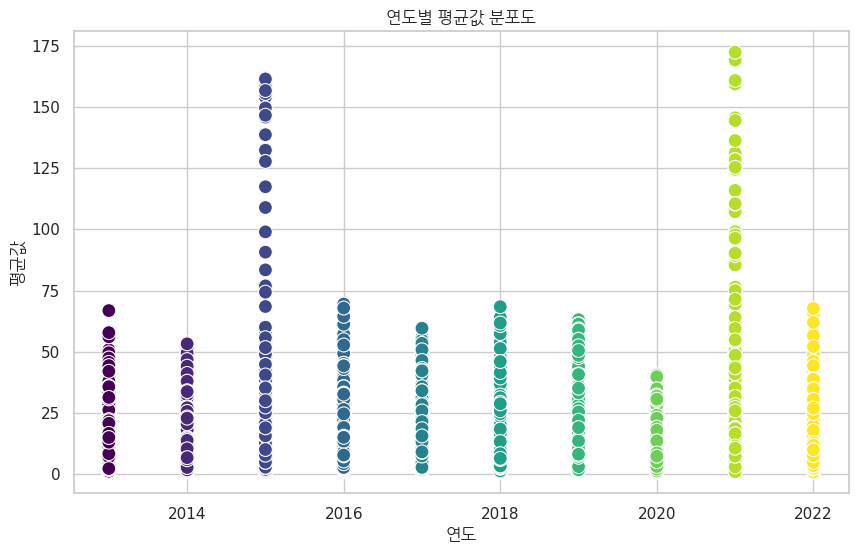

In [18]:
from pyspark.sql.functions import col, avg, substring, cast
import matplotlib.font_manager as fm

# 원하는 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# 폰트 이름으로 설정
plt.rc('font', family='NanumGothic')  

# 측정기 상태가 0인 경우 필터링
filtered_df = dataframe.filter(col("측정기 상태") == 0)

# 중복된 측정일시 기준으로 평균값 계산
grouped_df = filtered_df.groupBy("측정일시").agg(avg("평균값").alias("평균값"))

# 연도 추출
grouped_df = grouped_df.withColumn("연도", (substring(col("측정일시").cast("string"), 1, 4)).cast("int"))

# PySpark DataFrame을 Pandas DataFrame으로 변환
grouped_df_pd = grouped_df.toPandas()

# 인덱스를 리셋한 DataFrame 생성
reset_df = grouped_df_pd.reset_index(drop=True)

# Seaborn을 이용한 시각화
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reset_df, x="연도", y="평균값", hue="연도", palette="viridis", s=100, legend=False)

plt.title('연도별 평균값 분포도', fontproperties=font_prop)
plt.xlabel('연도', fontproperties=font_prop)
plt.ylabel('평균값', fontproperties=font_prop)

plt.show()

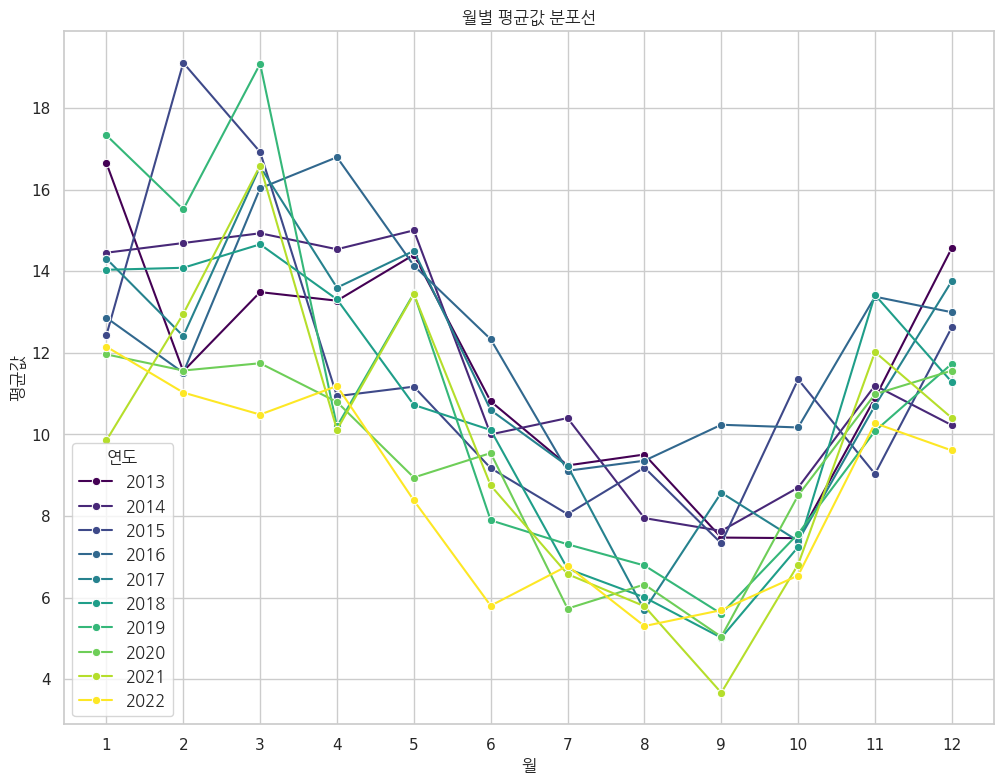

In [19]:
# 월 추출
grouped_df = grouped_df.withColumn("월", (substring(col("측정일시").cast("string"), 5, 2)).cast("int"))

# 월별 평균값 계산
monthly_avg = grouped_df.groupBy("연도", "월").agg(avg("평균값").alias("평균값"))

# 시각화
plt.figure(figsize=(12, 9))
sns.lineplot(data=monthly_avg.toPandas(), x="월", y="평균값", hue="연도", palette="viridis", marker="o", legend="full")

plt.title('월별 평균값 분포선', fontproperties=font_prop)
plt.xlabel('월', fontproperties=font_prop)
plt.ylabel('평균값', fontproperties=font_prop)

plt.xticks(ticks=range(1, 13))  # x축을 1부터 12까지 설정
plt.legend(title='연도', title_fontproperties=font_prop, prop=font_prop)

plt.show()